In [36]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt

To extract neighbors a mask is created that will be moved over the image to create new features.

In [37]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

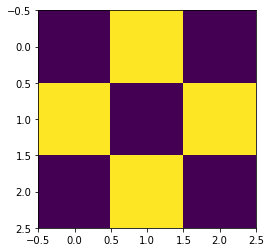

In [60]:
#Example of mask
plt.imshow(create_circular_mask(1))

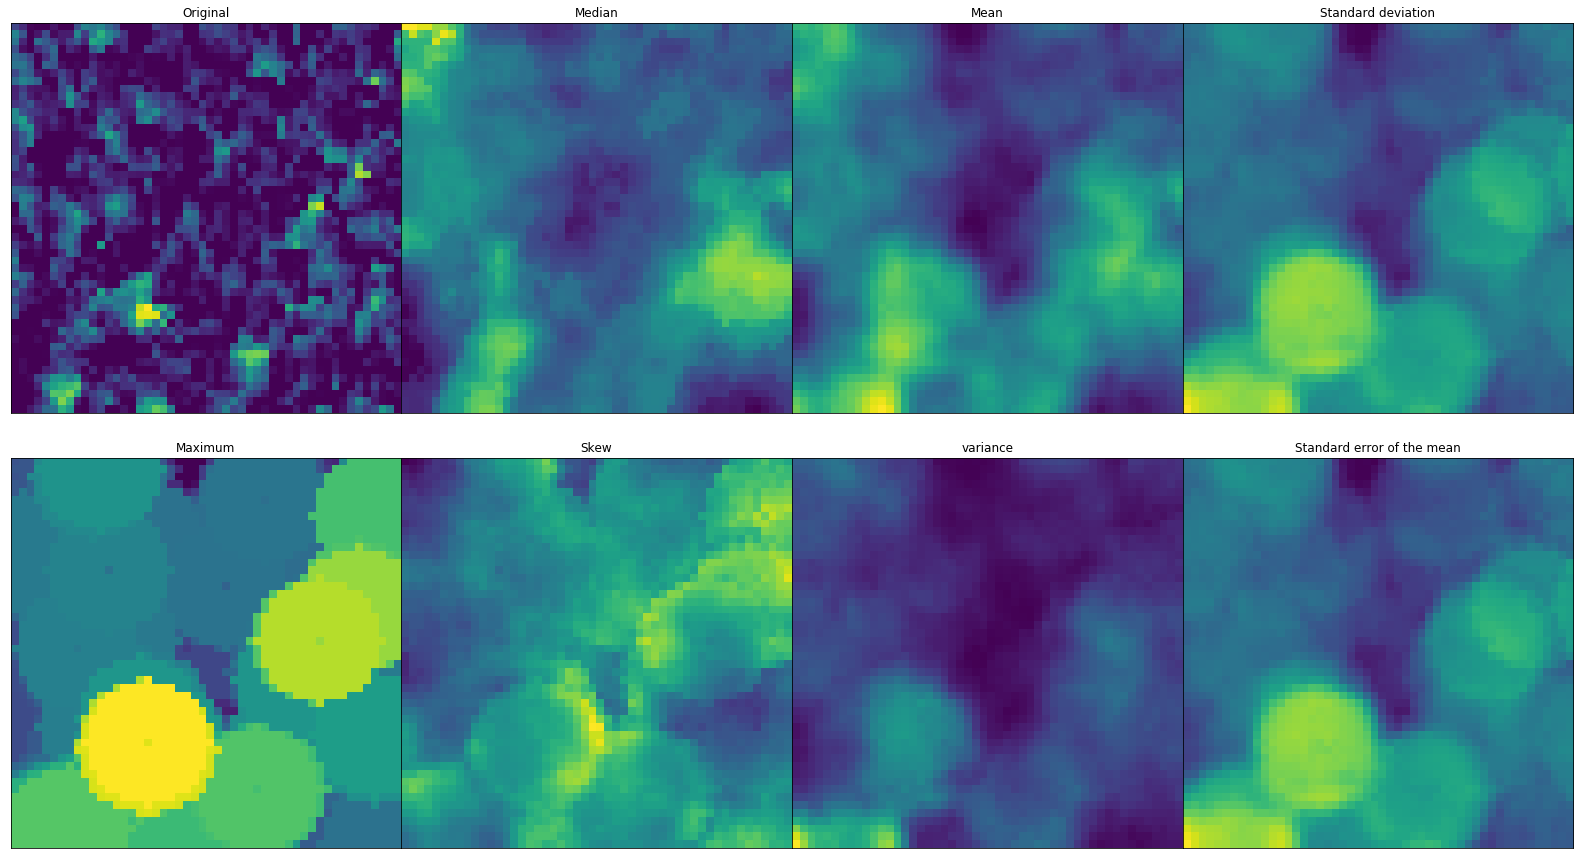

In [63]:
im = Image.open("croppedImage_impoundment.tif")
arr = np.asarray(im)
mask = create_circular_mask(8)

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,4,i+1) for i in range(8)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Original")
ax[0].imshow(arr)

ax[1].title.set_text("Median")
ax[1].imshow(gf(arr,np.nanmedian,footprint=mask))

ax[2].title.set_text("Mean")
ax[2].imshow(gf(arr,np.nanmean,footprint=mask))

ax[3].title.set_text("Standard deviation")
ax[3].imshow(gf(arr,np.nanstd,footprint=mask))

ax[4].title.set_text("Maximum")
ax[4].imshow(gf(arr,ms.tmax, footprint=mask))

ax[5].title.set_text("Skew")
ax[5].imshow(gf(arr,ms.skew,footprint=mask))

ax[6].title.set_text("variance")
ax[6].imshow(gf(arr,ms.trimmed_var,footprint=mask))

ax[7].title.set_text("Standard error of the mean")
ax[7].imshow(gf(arr,ms.sem,footprint=mask))